In [1]:
## Importing all the libraries we will need for the project

import pandas as pd
import os
from IPython.display import display, HTML
import pandas as pd
import sqlite3
from sqlite3 import Error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import tree
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import graphviz
import pydotplus

In [2]:
## Reading the data from final.csv file

dataset = pd.read_csv('final.csv')


In [3]:
## defining a function for creating connection
def create_connection(db_file, delete_db=False):
    if delete_db and os.path.exists(db_file):
        os.remove(db_file)

    conn = None
    
    try:
        conn = sqlite3.connect(db_file)
        conn.execute("PRAGMA foreign_keys = 1")
    
    except Error as e:
        print(e)

    return conn

## Defining a function for executing SQL statements
def execute_sql_statement(sql_statement, conn):
    cur = conn.cursor()
    cur.execute(sql_statement)
    rows = cur.fetchall()

    return rows

In [4]:
## Opening the connection

conn = create_connection('diabetes_detection.db', True)
cur = conn.cursor()

## Creating Table 1 : Genetics_and_Diabetes
sql_statement="""create table if not exists Genetics_and_Diabetes(
                                patient_ID integer not null primary key AUTOINCREMENT,
                                Diabetes text,
                                Name text,
                                sugar_level Integer,
                                parental_mother text,
                                parental_gradmother text,
                                parental_father text,
                                parental_gradfather text
                                )"""
cur.execute(sql_statement)


## Creating Table 2 : Patient
sql_statement="""create table if not exists Patient(
                                P_ID integer not null primary key Autoincrement,
                                patient_id integer not null,
                                daily_activity text,
                                age integer,
                                gender text,
                                Education_level text,
                                race text,
                                Foreign Key(patient_id) REFERENCES Genetics_and_Diabetes(patient_id)
                                
                                )"""
cur.execute(sql_statement)
    
## Creating Table 3 : AMD_satge 
sql_statement="""create table if not exists AMD_stage(
                                AS_ID integer not null primary key AUTOINCREMENT,
                                presence_any_AMD text,
                                AMD_stage text,
                                patient_id integer not null,
                                Foreign Key(patient_id) REFERENCES Genetics_and_Diabetes(patient_id)
                                )"""
cur.execute(sql_statement)


## Creating Table 4: reversing_steps_for_diabetes
sql_statement="""create table if not exists reversing_steps_for_diabetes(
                            RSD_ID integer not null primary key AUTOINCREMENT,
                            taking_prescription_hypertension text, 
                            Are_you_reducing_fat_or_calories_in_diet text,
                            Are_you_controlling_weight text,
                            Are_you_increasing_physical_activity text,
                            Are_you_reducing_fat_or_calories_in_diet_past_three_year text,
                            Are_you_controlling_weight_past_three_year text,
                            Are_you_increasing_physical_activity_past_three_year text,
                            patient_id integer not null,
                            Foreign Key(patient_id) REFERENCES Genetics_and_Diabetes(patient_id)    
                            )"""
cur.execute(sql_statement)

## Creating Table 5: past_health_questions
sql_statement=""" create table if not exists past_health_questions(
                            PH_ID integer not null primary key AUTOINCREMENT,
                            Ever_told_have_health_risk_for_diabetes text,
                            Ever_told_you_have_prediabetes text,
                            Had_blood_tested_past_three_years text,
                            Diabetes_affected_eyes_had_retinopathy text,
                            patient_id integer not null,
                            Foreign Key(patient_id) REFERENCES Genetics_and_Diabetes(patient_id)
                             )"""
cur.execute(sql_statement)

In [5]:
## Printing all 23 columns of our Diabetes dataset

print(dataset.columns)

Index(['Unnamed: 0', 'occurance_of_diabetes', 'name', 'sugar_level',
       'parental_mother_grandmother', 'parental_father_grandfather',
       'daily_activity', 'age', 'gender', 'education_level', 'race',
       'taking_prescription_hypertension', 'presence_any_AMD', 'AMD_stage',
       'Are_you_reducing_fat_or_calories_in_diet',
       'Are_you_controlling_weight', 'Are_you_increasing_physical_activity',
       'Are_you_reducing_fat_or_calories_in_diet_past_three_year',
       'Are_you_controlling_weight_past_three_year',
       'Are_you_increasing_physical_activity_past_three_year',
       'Ever_told_have_health_risk_for_diabetes',
       'Ever_told_you_have_prediabetes', 'Had_blood_tested_past_three_years',
       'Diabetes_affected_eyes_had_retinopathy', '8'],
      dtype='object')


In [6]:
## Assigning particular cells from the diabetes dataset
parental_mother_grandmother = dataset.iloc[:, 4]
parental_father_grandfather = dataset.iloc[:, 5]

## Defining empty lists to store the values
parental_mother = []
parental_grandmother = []
parental_father = []
parental_grandfather = []

## Seperating two values from a one column
for i in range(len(parental_father_grandfather)):
    temp = parental_father_grandfather[i].split(" ")
    temp2 = parental_mother_grandmother[i].split(" ")
    parental_father.append(temp[0])
    parental_grandfather.append(temp[1])
    parental_mother.append(temp2[0])
    parental_grandmother.append(temp2[1])

## Assigning particular cells to the table's column
data = {
    'Occurance of Diabetes' : dataset.iloc[:, 1],
    'Name' : dataset.iloc[:, 2],
    'Sugar Level' : dataset.iloc[:, 3],
    'Parental Mother': parental_mother,
    'Parental Grandmother': parental_grandmother,
    'Parental Father': parental_father,
    'Parental Grandfather': parental_grandfather    
       }
Genetics_DB = pd.DataFrame(data)
Genetics_DB

## Inserting values with the help of for loop in the table : Genetics_and_Diabetes
sql_statement = """
                    INSERT INTO Genetics_and_Diabetes
                    (Diabetes, Name, sugar_level, parental_mother, parental_gradmother,parental_father, parental_gradfather) 
                    Values(?,?,?,?,?,?,?);
                """
data_table = []
for i in range(100000):
    data_table.append((Genetics_DB.iloc[i,0],Genetics_DB.iloc[i,1],int(Genetics_DB.iloc[i,2]),Genetics_DB.iloc[i,3], Genetics_DB.iloc[i,4], Genetics_DB.iloc[i,5], Genetics_DB.iloc[i,6]))

cur.executemany(sql_statement,data_table)    
conn.commit()
Genetics_DB.head()

,Occurance of Diabetes,Name,Sugar Level,Parental Mother,Parental Grandmother,Parental Father,Parental Grandfather
0,Yes,John,261,Yes,Yes,Yes,Yes
1,Yes,Paul,299,Yes,Yes,Yes,No
2,No,Mark,207,Yes,Yes,No,Yes
3,No,James,93,No,No,Yes,Yes
4,Yes,Andrew,232,No,Yes,Yes,Yes


In [7]:
## Assigning particular cells to the table's column
data = {
    'Daily Activity': dataset.iloc[:, 6],
    'Age' : dataset.iloc[:, 7],
    'Gender' : dataset.iloc[:, 8],
    'Education Level' : dataset.iloc[:, 9],
    'Race' : dataset.iloc[:, 10]
}
table_patient_data = pd.DataFrame(data)
table_patient_data
        
## Inserting values with the help of for loop in the table : Patient
sql_statement = """
                    INSERT INTO Patient(
                    patient_ID,
                    daily_activity,
                    age,
                    gender,
                    Education_level,
                    race
                    ) Values(?,?,?,?,?,?);
                """
data_patient = []
for i in range(100000):
    temp = table_patient_data.iloc[i,0:7]
    s = temp[0].split(" ")
    for j in s:
        tuplep = (i+1,j.strip(),int(temp[1]),temp[2],temp[3],temp[4])
        data_patient.append(tuplep)
    
cur.executemany(sql_statement,data_patient)    
conn.commit()
table_patient_data.head()

,Daily Activity,Age,Gender,Education Level,Race
0,walking dancing gym yoga,89,Female,below undergrade,Asian
1,swimming,52,Female,None,Asian
2,dancing swimming,33,Male,None,Asian
3,walking yoga swimming,67,Male,Graduate,Asian
4,yoga gym,50,Male,below undergrade,Asian


In [8]:
## Assigning particular cells to the table's column
data = {
    'Presence of any AMD' : dataset.iloc[:, 12],
    'AMD Stage' : dataset.iloc[:, 13]
}

table_AMD = pd.DataFrame(data)
table_AMD

## Inserting values with the help of for loop in the table : AMD_stage
sql_statement = """
                    INSERT INTO AMD_stage(presence_any_AMD, AMD_stage, patient_id) Values(?,?,?);
                """
data_table = []
for i in range(100000):
    data_table.append((table_AMD.iloc[i,0],table_AMD.iloc[i,1], i+1))

    
cur.executemany(sql_statement,data_table) 
conn.commit()
table_AMD.head()

,Presence of any AMD,AMD Stage
0,NaN,NaN
1,NaN,late
2,NaN,intermediate
3,Not Known,NaN
4,Yes,NaN


In [9]:
## Assigning particular cells to the table's column
data = {
    'taking_prescription_hypertension' : dataset.iloc[:, 11], 
    'Are_you_reducing_fat_or_calories_in_diet' : dataset.iloc[:, 14],
    'Are_you_controlling_weight': dataset.iloc[:, 15],
    'Are_you_increasing_physical_activity': dataset.iloc[:, 16],
    'Are_you_reducing_fat_or_calories_in_diet_past_three_year' : dataset.iloc[:, 17],
    'Are_you_controlling_weight_past_three_year': dataset.iloc[:, 18],
    'Are_you_increasing_physical_activity_past_three_year': dataset.iloc[:, 19]
}
table5 = pd.DataFrame(data)
table5

## Inserting values with the help of for loop in the table : reversing_steps_for_diabetes
sql_statement = """
                    INSERT INTO reversing_steps_for_diabetes(
                    taking_prescription_hypertension, 
                    Are_you_reducing_fat_or_calories_in_diet ,
                    Are_you_controlling_weight ,
                    Are_you_increasing_physical_activity ,
                    Are_you_reducing_fat_or_calories_in_diet_past_three_year ,
                    Are_you_controlling_weight_past_three_year ,
                    Are_you_increasing_physical_activity_past_three_year, 
                    patient_id
                            ) 
                    Values(?,?,?,?,?,?,?,?);
                """
data_table = []
for i in range(100000):
    data_table.append((table5.iloc[i,0],table5.iloc[i,1],table5.iloc[i,2],table5.iloc[i,3],
                       table5.iloc[i,4],table5.iloc[i,5],table5.iloc[i,6], i+1))

    
cur.executemany(sql_statement,data_table)    
conn.commit()
table5.head()

,taking_prescription_hypertension,Are_you_reducing_fat_or_calories_in_diet,Are_you_controlling_weight,Are_you_increasing_physical_activity,Are_you_reducing_fat_or_calories_in_diet_past_three_year,Are_you_controlling_weight_past_three_year,Are_you_increasing_physical_activity_past_three_year
0,NaN,Yes,Don't know,No,Don't know,Don't know,No
1,Yes,No,Yes,Refused,Refused,Don't know,Refused
2,Not Known,Yes,Don't know,Don't know,Missing,Refused,Yes
3,Not Known,Missing,Refused,Refused,Refused,Yes,Yes
4,NaN,Don't know,No,Don't know,Yes,No,Yes


In [10]:
## Assigning particular cells to the table's column
data = {
    'Ever_told_have_health_risk_for_diabetes' :dataset.iloc[:,20],
    'Ever_told_you_have_prediabetes' : dataset.iloc[:,21],
    'Had_blood_tested_past_three_years' : dataset.iloc[:,22],
    'Diabetes_affected_eyes_had_retinopathy' : dataset.iloc[:, 23]
}
table6 = pd.DataFrame(data)
table6

## Inserting values with the help of for loop in the table : past_health_questions
sql_statement = """
                    INSERT INTO past_health_questions(
                    Ever_told_have_health_risk_for_diabetes,
                    Ever_told_you_have_prediabetes ,
                    Had_blood_tested_past_three_years ,
                    Diabetes_affected_eyes_had_retinopathy,
                    patient_id
                            ) 
                    Values(?,?,?,?,?);
                """
data_table = []
for i in range(100000):
    data_table.append((table6.iloc[i,0],table6.iloc[i,1],table6.iloc[i,2],table6.iloc[i,3], i+1))

cur.executemany(sql_statement,data_table)    
conn.commit()
table6.head()

,Ever_told_have_health_risk_for_diabetes,Ever_told_you_have_prediabetes,Had_blood_tested_past_three_years,Diabetes_affected_eyes_had_retinopathy
0,No,Missing,Don't know,Missing
1,Missing,Refused,Refused,Refused
2,No,Refused,Missing,Missing
3,No,Refused,Missing,Refused
4,Don't know,Yes,Refused,Don't know


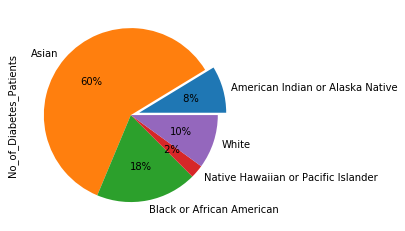

In [11]:
## Plotting a pie chart according to various races

sql_statement = """
                Select P.race, count(distinct G.patient_ID) as No_of_Diabetes_Patients
                from Genetics_and_Diabetes G
                inner join Patient P
                on G.patient_ID = P.patient_ID
                group by P.race
                
                """

df = pd.read_sql_query(sql_statement, conn)
df.set_index('race', inplace=True)
explode = [0.1,0,0,0,0]
df.plot.pie(y='No_of_Diabetes_Patients', legend=False, explode = explode, autopct = '%2d%%')

,No_of_Diabetes_Patients
Education_level,
Graduate,128
None,1053
below undergrade,1077
undergrade,251


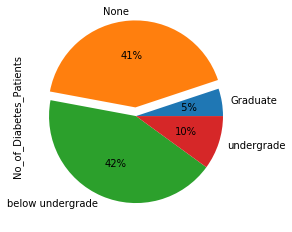

In [12]:
## Plotting a pie chart according to education levels

sql_statement = """
                Select P.Education_level, count(distinct G.patient_ID) as No_of_Diabetes_Patients
                from Genetics_and_Diabetes G
                inner join Patient P on G.patient_ID = P.patient_ID
                inner join reversing_steps_for_diabetes R on G.patient_ID = R.patient_ID
                where R.Are_you_controlling_weight = 'Yes'
                and R.taking_prescription_hypertension = 'Yes'
                and G.Diabetes = 'Yes'
                group by P.Education_level
                
                """

df = pd.read_sql_query(sql_statement, conn)
df.set_index('Education_level', inplace=True)
explode = [0,0.1,0,0]
df.plot.pie(y='No_of_Diabetes_Patients', legend=False, explode = explode, autopct = '%2d%%')
df

,No_of_Diabetes_Patients
gender,
Female,34581
Male,65419


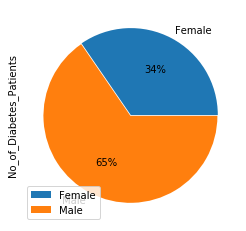

In [13]:
## Plotting a pie chart according to gender

sql_statement = """
                Select P.gender, count(distinct G.patient_ID) as No_of_Diabetes_Patients
                from Genetics_and_Diabetes G
                inner join Patient P
                on G.patient_ID = P.patient_ID
                group by P.gender
                
                """

df = pd.read_sql_query(sql_statement, conn)
df.set_index('gender', inplace=True)
explode = [0,0.01]
df.plot.pie(y='No_of_Diabetes_Patients', legend=True, explode = explode , autopct = '%2d%%')
df

,gender,No_of_Diabetes_Patients
0,Female,839
1,Male,1670


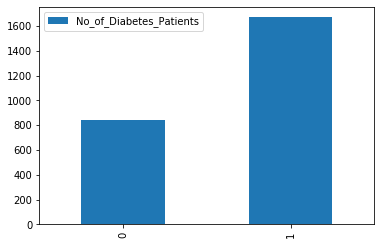

In [14]:
## Plotting a bar garph representing No. of Diabetes patients in each gender

sql_statement = """
                Select P.gender, count(distinct G.patient_ID) as No_of_Diabetes_Patients
                from Genetics_and_Diabetes G
                inner join Patient P on G.patient_ID = P.patient_ID
                inner join reversing_steps_for_diabetes R on G.patient_ID = R.patient_ID
                where R.Are_you_controlling_weight = 'Yes'
                and R.taking_prescription_hypertension = 'Yes'
                and G.Diabetes = 'Yes'
                group by P.gender
                
                """

df = pd.read_sql_query(sql_statement, conn)
df.plot.bar( fontsize = '10')
df

,race,No_of_Diabetes_Patients
0,American Indian or Alaska Native,44
1,Asian,278
2,Black or African American,101
3,Native Hawaiian or Pacific Islander,9
4,White,53


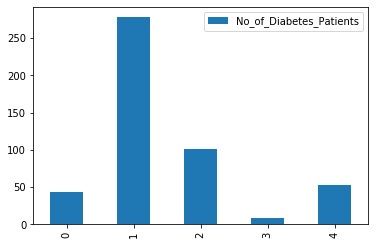

In [15]:
## Plotting a bar garph representing No. of Diabetes patients in each race

sql_statement = """
                Select P.race, count(distinct G.patient_ID) as No_of_Diabetes_Patients
                from Genetics_and_Diabetes G
                inner join Patient P on G.patient_ID = P.patient_ID
                inner join reversing_steps_for_diabetes R on G.patient_ID = R.patient_ID
                inner join past_health_questions PH on G.patient_ID = PH.patient_ID
                where R.taking_prescription_hypertension = 'Yes'
                and PH.Ever_told_have_health_risk_for_diabetes = 'Yes'
                and PH.Ever_told_you_have_prediabetes = 'Yes'
                and G.Diabetes = 'Yes'
                group by P.race
                
                """
df = pd.read_sql_query(sql_statement, conn)
df.plot.bar( fontsize = '10')
df

In [16]:
## Encoded every categorical columns

sql_st = "Select * from Genetics_and_Diabetes"

df = pd.read_sql_query(sql_st, conn)
df

X = df.iloc[:,3:]
Y = df.iloc[:, 1]

X.parental_father = X.parental_father.astype('category').cat.codes
X.parental_gradfather = X.parental_gradfather.astype('category').cat.codes
X.parental_mother = X.parental_mother.astype('category').cat.codes
X.parental_gradmother = X.parental_gradmother.astype('category').cat.codes

In [17]:
## Implementing Logistic Regression

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=15,stratify = Y)
        
logisticModel = LogisticRegression()
logisticModel.fit(X_train, y_train)
    
## Predicting probablity values
y_predicted = logisticModel.predict(X_test)
    
## Creating a confusion matrix with the predicted values
confusionMatrix = metrics.confusion_matrix(y_test, y_predicted)
    
## Calclulating accuracy of the model from the confusion matrix
accuracy = (confusionMatrix[0][0] + confusionMatrix[1][1])/(sum(confusionMatrix[0] + confusionMatrix[1]))
    
confusionMatrix    

accuracy



E:\ANACONDA\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9087

In [18]:
## Implementing KNN model

KNN_model = KNeighborsClassifier(n_neighbors=5)
KNN_model.fit(X_train, y_train)

y_predicted = KNN_model.predict(X_test)

## Creating a confusion matrix with the predicted values
confusionMatrix = metrics.confusion_matrix(y_test, y_predicted)
    
## Calclulating accuracy of the model from the confusion matrix
accuracy = (confusionMatrix[0][0] + confusionMatrix[1][1])/(sum(confusionMatrix[0] + confusionMatrix[1]))
    
confusionMatrix  
accuracy

0.9023333333333333

In [19]:
## Implementing Neural Network Model

NN_model = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(3, 6), random_state=1)
NN_model.fit(X_train, y_train)

## Predicting probablity values
y_predicted = NN_model.predict(X_test)
             
## Creating a confusion matrix with the predicted values
confusionMatrix = metrics.confusion_matrix(y_test, y_predicted)
    
## Calclulating accuracy of the model from the confusion matrix
accuracy = (confusionMatrix[0][0] + confusionMatrix[1][1])/(sum(confusionMatrix[0] + confusionMatrix[1]))
    
confusionMatrix  
accuracy

0.898

In [20]:
## Implementing Decision Tree Model

tree_model = tree.DecisionTreeClassifier()
tree_model = tree_model.fit(X_train, y_train)

## Predicting probablity values
y_predicted = tree_model.predict(X_test)
             
## Creating a confusion matrix with the predicted values
confusionMatrix = metrics.confusion_matrix(y_test, y_predicted)
    
## Calclulating accuracy of the model from the confusion matrix
accuracy = (confusionMatrix[0][0] + confusionMatrix[1][1])/(sum(confusionMatrix[0] + confusionMatrix[1]))
    
confusionMatrix  
accuracy

0.9100333333333334

In [21]:
## Plotted decision tree

dot_data = tree.export_graphviz(tree_model, out_file=None, feature_names=X.columns, filled=True)
graph = graphviz.Source(dot_data, format="png") 

In [22]:
graph = pydotplus.graph_from_dot_data(dot_data)
graph

In [23]:
## Creating .svg file for decision tree

graph.write_svg('treeop.svg')

True

In [24]:
## Displaying probability of response variable

proba = tree_model.predict_proba(X_test)
print("Predication Probabilities")
proba

Predication Probabilities


array([[0.27272727, 0.72727273],
       [0.        , 1.        ],
       [0.85714286, 0.14285714],
       ...,
       [0.11111111, 0.88888889],
       [1.        , 0.        ],
       [0.2       , 0.8       ]])

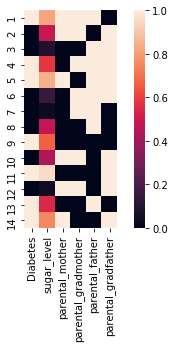

In [25]:
## Plotting the heat map 
temp_df = df.drop(columns = ['patient_ID','Name'])

temp_df

temp_df.parental_father = temp_df.parental_father.astype('category').cat.codes
temp_df.parental_gradfather = temp_df.parental_gradfather.astype('category').cat.codes
temp_df.parental_mother = temp_df.parental_mother.astype('category').cat.codes
temp_df.parental_gradmother = temp_df.parental_gradmother.astype('category').cat.codes
temp_df.Diabetes = temp_df.Diabetes.astype('category').cat.codes

temp_df = (temp_df - temp_df.min())/(temp_df.max() - temp_df.min())
temp_df = temp_df.iloc[1:15,:]
sns.heatmap(temp_df)

plt.imshow(temp_df)

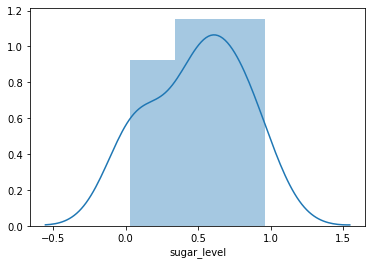

In [26]:
## Plotted histogram of sugar level

sns.distplot(temp_df.sugar_level)

In [27]:
## Preparing dataset from which we can predict the chance of diabetes

sql_statement = """
                Select *
                from Genetics_and_Diabetes G
                inner join reversing_steps_for_diabetes R on G.patient_ID = R.patient_ID
                inner join AMD_stage A on G.patient_ID = A.patient_ID
                inner join past_health_questions PH on G.patient_ID = PH.patient_ID
                group by G.patient_ID
                """
df = pd.read_sql_query(sql_statement, conn)
df = df.drop(columns = ['Name','patient_ID','RSD_ID','AS_ID','patient_id','PH_ID','patient_id'])
col = list(df.columns)
col

['Diabetes',
 'sugar_level',
 'parental_mother',
 'parental_gradmother',
 'parental_father',
 'parental_gradfather',
 'taking_prescription_hypertension',
 'Are_you_reducing_fat_or_calories_in_diet',
 'Are_you_controlling_weight',
 'Are_you_increasing_physical_activity',
 'Are_you_reducing_fat_or_calories_in_diet_past_three_year',
 'Are_you_controlling_weight_past_three_year',
 'Are_you_increasing_physical_activity_past_three_year',
 'presence_any_AMD',
 'AMD_stage',
 'Ever_told_have_health_risk_for_diabetes',
 'Ever_told_you_have_prediabetes',
 'Had_blood_tested_past_three_years',
 'Diabetes_affected_eyes_had_retinopathy']

In [28]:
## Finding correlation of each column & encoding them as well

for i in range(2,len(col)):
    df.loc[:,col[i]] = df.loc[:,col[i]].astype('category').cat.codes

correlation = df.corr()

coef = correlation.iloc[0]
coef

## Data Normalization
df = df.iloc[:, 1:]
df = (df - df.min())/(df.max() - df.min())

df.head()

,sugar_level,parental_mother,parental_gradmother,parental_father,parental_gradfather,taking_prescription_hypertension,Are_you_reducing_fat_or_calories_in_diet,Are_you_controlling_weight,Are_you_increasing_physical_activity,Are_you_reducing_fat_or_calories_in_diet_past_three_year,Are_you_controlling_weight_past_three_year,Are_you_increasing_physical_activity_past_three_year,presence_any_AMD,AMD_stage,Ever_told_have_health_risk_for_diabetes,Ever_told_you_have_prediabetes,Had_blood_tested_past_three_years,Diabetes_affected_eyes_had_retinopathy
0,0.684588,1.0,1.0,1.0,1.0,0.000000,1.00,0.00,0.50,0.00,0.00,0.50,0.000000,0.000000,0.50,0.25,0.00,0.25
1,0.820789,1.0,1.0,1.0,0.0,1.000000,0.50,1.00,0.75,0.75,0.00,0.75,0.000000,0.666667,0.25,0.75,0.75,0.75
2,0.491039,1.0,1.0,0.0,1.0,0.666667,1.00,0.00,0.00,0.25,0.75,1.00,0.000000,0.333333,0.50,0.75,0.25,0.25
3,0.082437,0.0,0.0,1.0,1.0,0.666667,0.25,0.75,0.75,0.75,1.00,1.00,0.666667,0.000000,0.50,0.75,0.25,0.75
4,0.580645,0.0,1.0,1.0,1.0,0.000000,0.00,0.50,0.00,1.00,0.50,1.00,1.000000,0.000000,0.00,1.00,0.75,0.00


In [29]:
## Predicting chance of a person having diabetes

proba = []
for j in range(len(df)):
    temp_data = df.iloc[j]
    prob = 0
    for i in range(1,len(coef)-1):
        prob += coef.iloc[i] * temp_data.iloc[i]
    proba.append(prob)

In [30]:
proba = [abs(i*100) for i in proba]
df.insert(0,"Chance", proba, True)
df.head()

,Chance,sugar_level,parental_mother,parental_gradmother,parental_father,parental_gradfather,taking_prescription_hypertension,Are_you_reducing_fat_or_calories_in_diet,Are_you_controlling_weight,Are_you_increasing_physical_activity,Are_you_reducing_fat_or_calories_in_diet_past_three_year,Are_you_controlling_weight_past_three_year,Are_you_increasing_physical_activity_past_three_year,presence_any_AMD,AMD_stage,Ever_told_have_health_risk_for_diabetes,Ever_told_you_have_prediabetes,Had_blood_tested_past_three_years,Diabetes_affected_eyes_had_retinopathy
0,0.564667,0.684588,1.0,1.0,1.0,1.0,0.000000,1.00,0.00,0.50,0.00,0.00,0.50,0.000000,0.000000,0.50,0.25,0.00,0.25
1,0.518605,0.820789,1.0,1.0,1.0,0.0,1.000000,0.50,1.00,0.75,0.75,0.00,0.75,0.000000,0.666667,0.25,0.75,0.75,0.75
2,0.040097,0.491039,1.0,1.0,0.0,1.0,0.666667,1.00,0.00,0.00,0.25,0.75,1.00,0.000000,0.333333,0.50,0.75,0.25,0.25
3,0.587551,0.082437,0.0,0.0,1.0,1.0,0.666667,0.25,0.75,0.75,0.75,1.00,1.00,0.666667,0.000000,0.50,0.75,0.25,0.75
4,0.369841,0.580645,0.0,1.0,1.0,1.0,0.000000,0.00,0.50,0.00,1.00,0.50,1.00,1.000000,0.000000,0.00,1.00,0.75,0.00


In [31]:
## Implementing Linear Regression
X = df.iloc[:, 1:]
Y = df.iloc[:, 0]

X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, 1:], df.iloc[:, 0], test_size=0.30, random_state=15)
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

## Predicting the chance of Diabetes for testing dataset
y_predicted = linear_model.predict(X_test)
y_predicted

array([0.39909733, 0.61120303, 0.66453244, ..., 0.49046645, 0.36538292,
       0.40850234])